In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 7]

files = ['../data/lucknow.csv',
         '../data/mirzapur.csv',
         '../data/noida.csv',
         '../data/unnao.csv',
         '../data/varanasi.csv']

In [2]:
demand = pd.read_csv('../data/up_consolidated.csv', parse_dates=['date_time']).set_index('date_time', drop=True)
demand.index = pd.to_datetime(demand.index)
hourly_avg = demand.groupby(pd.Grouper(freq='H')).mean()

In [3]:
def get_city_data(citypath):
    city = pd.read_csv(citypath, parse_dates=['date']).set_index('date', drop=True)
    city.index = pd.to_datetime(city.index).tz_localize(None)
    return city

In [4]:
cities = [get_city_data(citypath) for citypath in files]

In [10]:
def plot_key(year, key):
    vis = {}
    for i,df in enumerate(cities):
        vis[files[i]] = df.groupby(pd.Grouper(freq='D')).mean().loc[str(year):][key]
    pd.DataFrame(vis).plot()

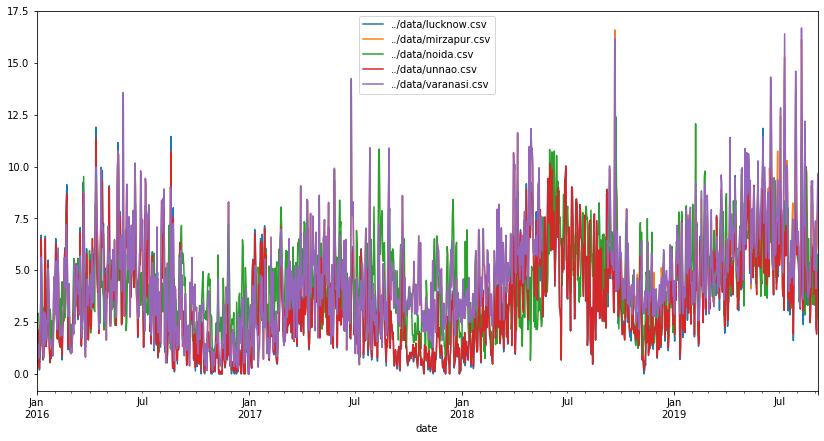

In [51]:
plot_key(2016, 'wind_speed')

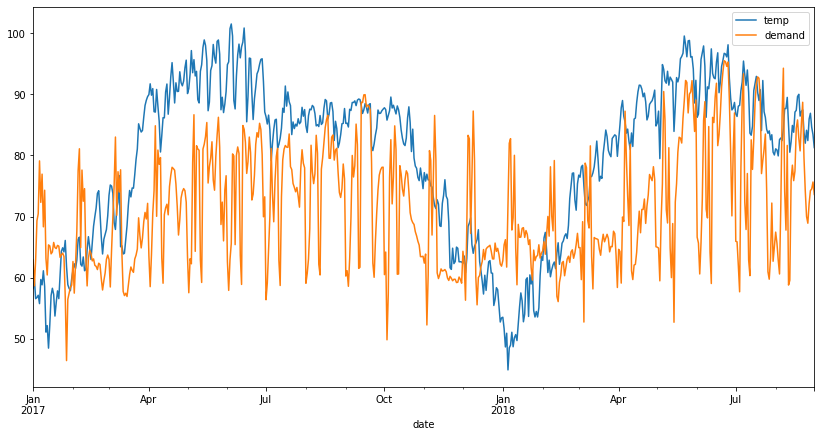

In [41]:
pd.DataFrame({
    'temp': cities[0]['temperature'].groupby(pd.Grouper(freq='D')).mean().loc['2017-01':'2018-08'],
    'demand': hourly_avg.groupby(pd.Grouper(freq='D')).mean().loc['2017-01':'2018-08']['demand']/200
}).plot()

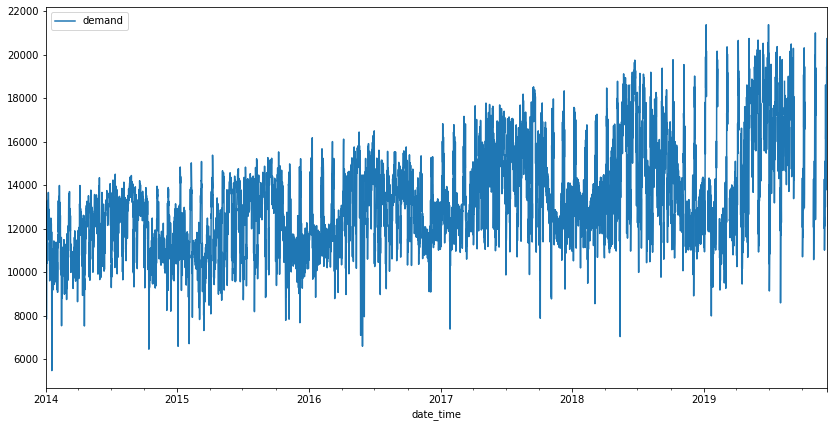

In [56]:
hourly_avg.groupby(pd.Grouper(freq='8H')).mean().loc['2014-01':'2019-12'].plot()